Importamos las librerias necesarias

In [1]:
from _utils import pd, plt, sns, WordCloud

Leemos el dataset limpio

In [2]:
df = pd.read_csv("../../datasets/csv/coins_clean.csv")

Realizamos las visualizaciones

In [3]:
df.iloc[:, 1:] 

,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,...,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated,category,category_id,exchanges_centralized,exchanges_decentralized
0,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,60353.000000,1.185324e+12,1,1.264032e+12,3.940632e+10,64555.000000,59131.000000,...,-18.42641,2024-03-14T07:10:36.635Z,67.810000,8.860604e+04,2013-07-06T00:00:00.000Z,2024-04-30T22:17:35.155Z,Pixels Game,pixels-game,"['binance', 'bybit_spot', 'nami_exchange', 'up...","['thorswap', 'dexalot', 'cube']"
1,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,3000.410000,3.646028e+11,2,3.646028e+11,1.924903e+10,3244.680000,2916.380000,...,-38.80647,2021-11-10T14:24:19.604Z,0.432979,6.893516e+05,2015-10-20T00:00:00.000Z,2024-04-30T22:17:27.884Z,Pixels Game,pixels-game,"['binance', 'bybit_spot', 'nami_exchange', 'up...","['curve_ethereum', 'thorswap', 'openocean_fina..."
2,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.999586,1.105704e+11,3,1.105704e+11,6.098278e+10,1.003000,0.994201,...,-24.52065,2018-07-24T00:00:00.000Z,0.572521,7.443268e+01,2015-03-02T00:00:00.000Z,2024-04-30T22:15:26.224Z,Pixels Game,pixels-game,"['binance', 'bybit_spot', 'nami_exchange', 'ok...","['jupiter', 'raydium2', 'curve_ethereum', 'met..."
3,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,580.300000,8.890616e+10,4,8.890616e+10,2.073207e+09,602.910000,556.220000,...,-15.67710,2021-05-10T07:24:17.097Z,0.039818,1.453308e+06,2017-10-19T00:00:00.000Z,2024-04-30T22:17:48.955Z,Pixels Game,pixels-game,"['binance', 'bybit_spot', 'nami_exchange', 'ok...","['uniswap_v3', 'thorswap', 'openocean_finance'..."
4,sol,Solana,https://assets.coingecko.com/coins/images/4128...,126.620000,5.638658e+10,5,7.247136e+10,3.975282e+09,139.460000,121.450000,...,-51.67955,2021-11-06T21:54:35.825Z,0.500801,2.498250e+04,2020-05-11T19:35:23.449Z,2024-04-30T22:17:25.085Z,Pixels Game,pixels-game,"['binance', 'bybit_spot', 'nami_exchange', 'up...","['injective', 'cube']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8362,tony,TONY THE DUCK,https://assets.coingecko.com/coins/images/3626...,0.004903,0.000000e+00,-1,4.882607e+06,9.435300e+04,0.005853,0.004320,...,-49.73811,2024-04-17T08:09:41.991Z,0.001137,3.305317e+02,2024-03-20T17:39:22.521Z,2024-04-30T22:21:48.781Z,TON Meme Coins,ton-meme-coins,[],['ston_fi']
8363,tome,Toon Of Meme,https://assets.coingecko.com/coins/images/3632...,0.000001,0.000000e+00,-1,-1.000000e+00,1.101900e+02,0.000001,0.000001,...,-87.00803,2024-03-25T09:00:47.027Z,0.000001,2.175550e+00,2024-04-30T19:59:31.852Z,2024-04-30T22:14:49.394Z,TON Meme Coins,ton-meme-coins,[],['dedust']
8364,akita,Akita Inu,https://assets.coingecko.com/coins/images/3637...,0.000104,0.000000e+00,-1,1.032100e-04,4.459500e+02,0.000121,0.000102,...,-87.11610,2024-03-25T04:46:12.782Z,0.000102,1.646140e+00,2024-04-30T19:51:23.031Z,2024-04-30T22:21:48.478Z,TON Meme Coins,ton-meme-coins,[],['ston_fi']
8365,utn,Uniton Token,https://assets.coingecko.com/coins/images/3691...,0.000058,0.000000e+00,-1,1.155070e+05,2.935850e+03,0.000068,0.000057,...,-84.94241,2024-04-12T12:37:30.887Z,0.000052,1.221140e+01,2024-04-28T04:25:14.305Z,2024-04-30T22:21:49.481Z,TON Meme Coins,ton-meme-coins,[],['ston_fi']


In [4]:
df.describe()

,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,atl,atl_change_percentage
count,8.367000e+03,8.367000e+03,8367.000000,8.367000e+03,8.367000e+03,8.367000e+03,8.367000e+03,8.367000e+03,8367.000000,8.367000e+03,8367.000000,8.367000e+03,8.367000e+03,8.367000e+03,8.367000e+03,8367.000000,8367.000000,8.367000e+03
mean,3.889064e+02,2.947104e+08,822.439584,3.186563e+43,2.346463e+07,4.327446e+02,3.617818e+02,-1.477985e+01,-3.756951,-1.453022e+07,-1.318639,2.270173e+19,2.390343e+72,2.390343e+72,1.407910e+04,-80.926013,179.581742,2.186693e+42
std,1.701896e+04,1.368189e+10,1187.329771,2.060945e+45,8.376435e+08,1.937869e+04,1.625592e+04,2.192486e+03,44.718508,6.757117e+08,44.273312,1.468219e+21,1.545981e+74,1.545981e+74,7.769487e+05,23.433881,10798.515211,1.894682e+44
min,0.000000e+00,0.000000e+00,-1.000000,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.703741e+05,-91.561320,-5.707336e+10,-100.000000,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,-100.000000,-270.577376,-1.283882e+02
25%,3.923450e-04,0.000000e+00,-1.000000,2.538620e+05,2.071440e+03,4.289950e-04,3.603050e-04,-5.164625e-03,-8.515890,-2.193716e+05,-4.865295,0.000000e+00,4.501016e+07,-1.000000e+00,8.258930e-03,-98.238695,0.000090,2.408953e+01
50%,9.169340e-03,0.000000e+00,-1.000000,2.849204e+06,5.101800e+04,1.031648e-02,8.680160e-03,-1.450955e-04,-4.922510,0.000000e+00,0.000000,0.000000e+00,6.500000e+08,1.000000e+08,2.418480e-01,-90.936750,0.002209,1.259296e+02
75%,1.793355e-01,6.155237e+06,1451.500000,2.947488e+07,4.597280e+05,1.988300e-01,1.706510e-01,-2.311598e-08,-0.660090,0.000000e+00,0.000000,2.000000e+08,3.000000e+09,1.000000e+09,2.450000e+00,-71.576460,0.041461,5.786939e+02
max,1.502316e+06,1.185324e+12,4385.000000,1.333099e+47,6.098278e+10,1.716157e+06,1.451128e+06,1.038180e+05,2506.164860,1.507412e+08,2540.430930,9.497004e+22,1.000000e+76,1.000000e+76,6.322948e+07,1.543600,974955.000000,1.730252e+46


Visualizacion de las coins mas caras segun su precio actual

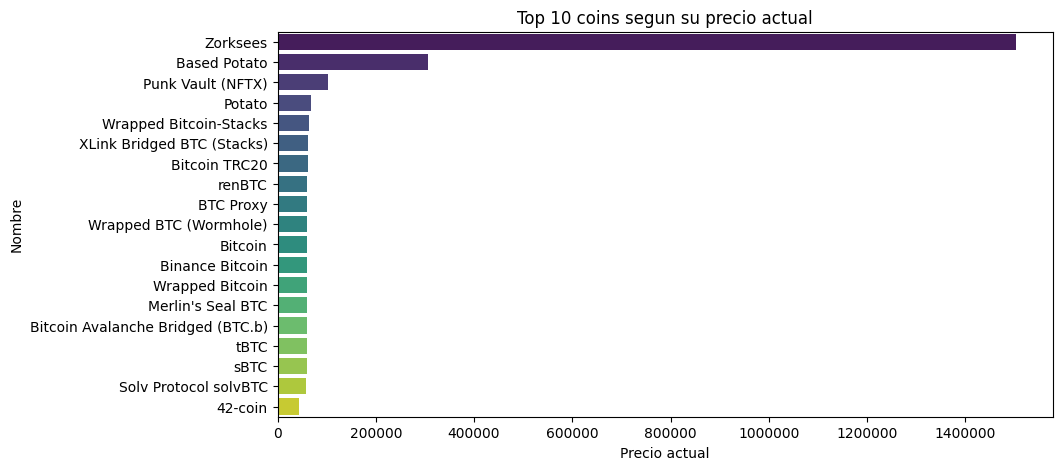

In [5]:
# visualizacion con plt de las current_price de las 10 coins mas caras
df_pivot = df.sort_values('current_price', ascending=False).head(20)
plt.figure(figsize=(10, 5))
sns.barplot(x='current_price', y='name', data=df_pivot, palette='viridis',hue='name')
plt.title('Top 10 coins segun su precio actual')
# cambiar la notacion cientifica de los ejes a numeros
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Precio actual')
plt.ylabel('Nombre')
plt.show()

analisis : ....

Visualizacion de las coins segun su capitalizacion de mercado

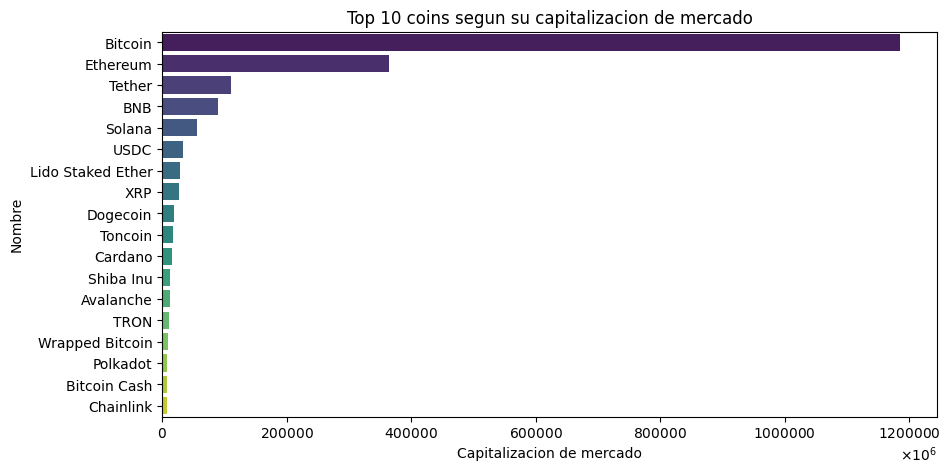

In [6]:
# visualizacion con plt de las coins mas populares
df_pivot = df.sort_values('market_cap', ascending=False).head(20)
plt.figure(figsize=(10, 5))
sns.barplot(x='market_cap', y='name', data=df_pivot, palette='viridis',hue='name')
plt.title('Top 10 coins segun su capitalizacion de mercado')
# cambiar la notacion cientifica de los ejes a numeros
plt.ticklabel_format(style='scientific', axis='x', useMathText= True, scilimits=(6,6))

plt.xlabel('Capitalizacion de mercado')
plt.ylabel('Nombre')
plt.show()

Visualizacion de las monedas con el precio historico mas alto

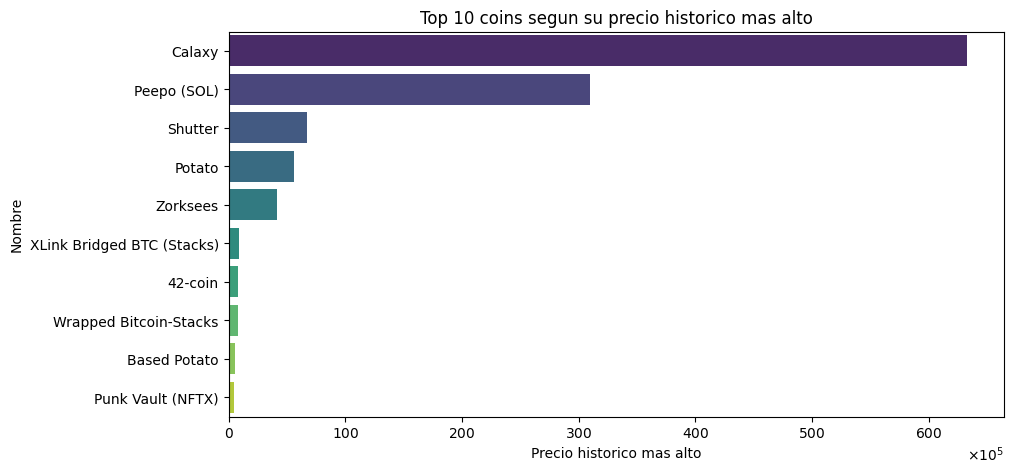

In [7]:
# visualizacion con plt de las coins con el precio historico mas alto
df_pivot = df.sort_values('ath', ascending=False).head(n=10)
plt.figure(figsize=(10, 5))
sns.barplot(x='ath', y='name', data=df_pivot, palette='viridis',hue='name')
plt.title('Top 10 coins segun su precio historico mas alto')
# cambiar la notacion cientifica de los ejes a numeros
plt.ticklabel_format(style='scientific', axis='x', useMathText= True, scilimits=(5,5))
plt.xlabel('Precio historico mas alto')
plt.ylabel('Nombre')
plt.show()

Visualizacion de las fechas de los maximos historicos

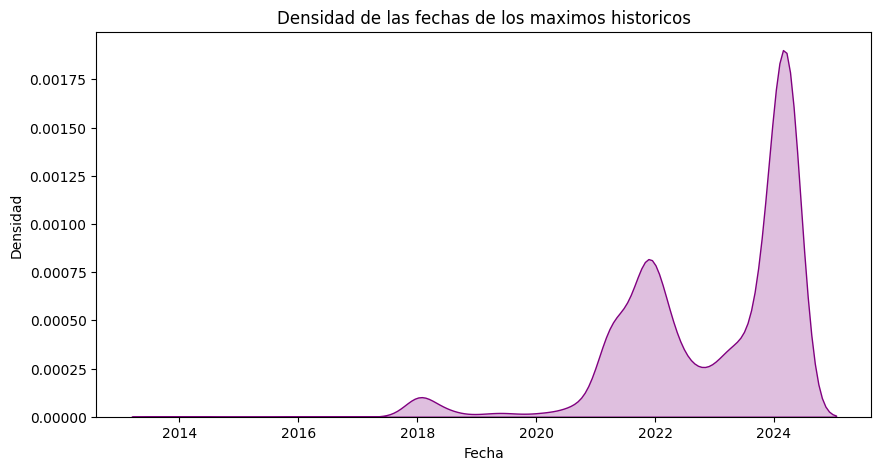

In [8]:
df_pivot = df.copy()
df_pivot['ath_date'] = pd.to_datetime(df_pivot['ath_date'])

plt.figure(figsize=(10, 5))
sns.kdeplot(df_pivot['ath_date'], color='purple', fill=True) # type: ignore
plt.title('Densidad de las fechas de los maximos historicos')
plt.xlabel('Fecha')
plt.ylabel('Densidad')
plt.show()


Visualizacion de las monedas que presentaron mayor cambio en su precio las 24 horas ultimas

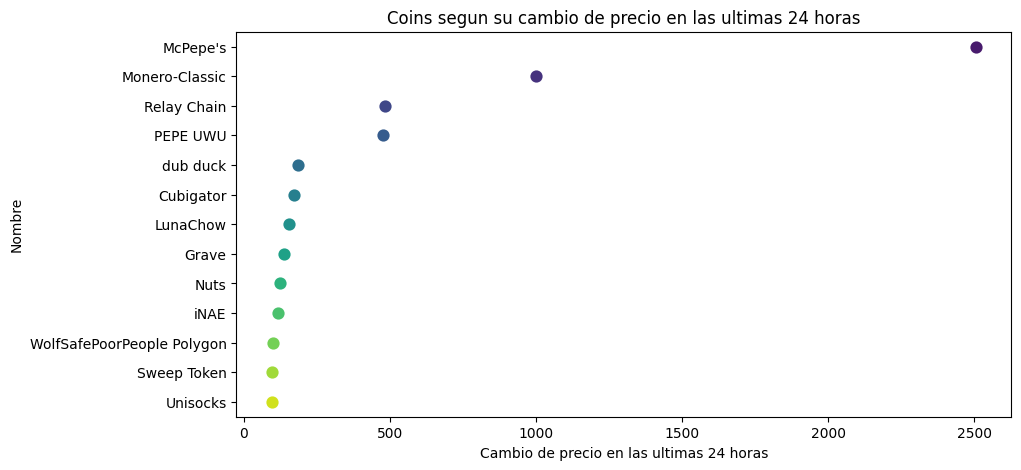

In [9]:
# Visualizacion de las monedas que presentaron mayor cambio en su precio las 24 horas ultimas
df_pivot = df.sort_values('price_change_percentage_24h', ascending=False).head(25)
plt.figure(figsize=(10, 5))
sns.pointplot(x='price_change_percentage_24h', y='name', data=df_pivot, palette='viridis', hue='name')
plt.title('Coins segun su cambio de precio en las ultimas 24 horas')
plt.xlabel('Cambio de precio en las ultimas 24 horas')
plt.ylabel('Nombre')
plt.show()

Visualizacion de las exchanges mas presentes

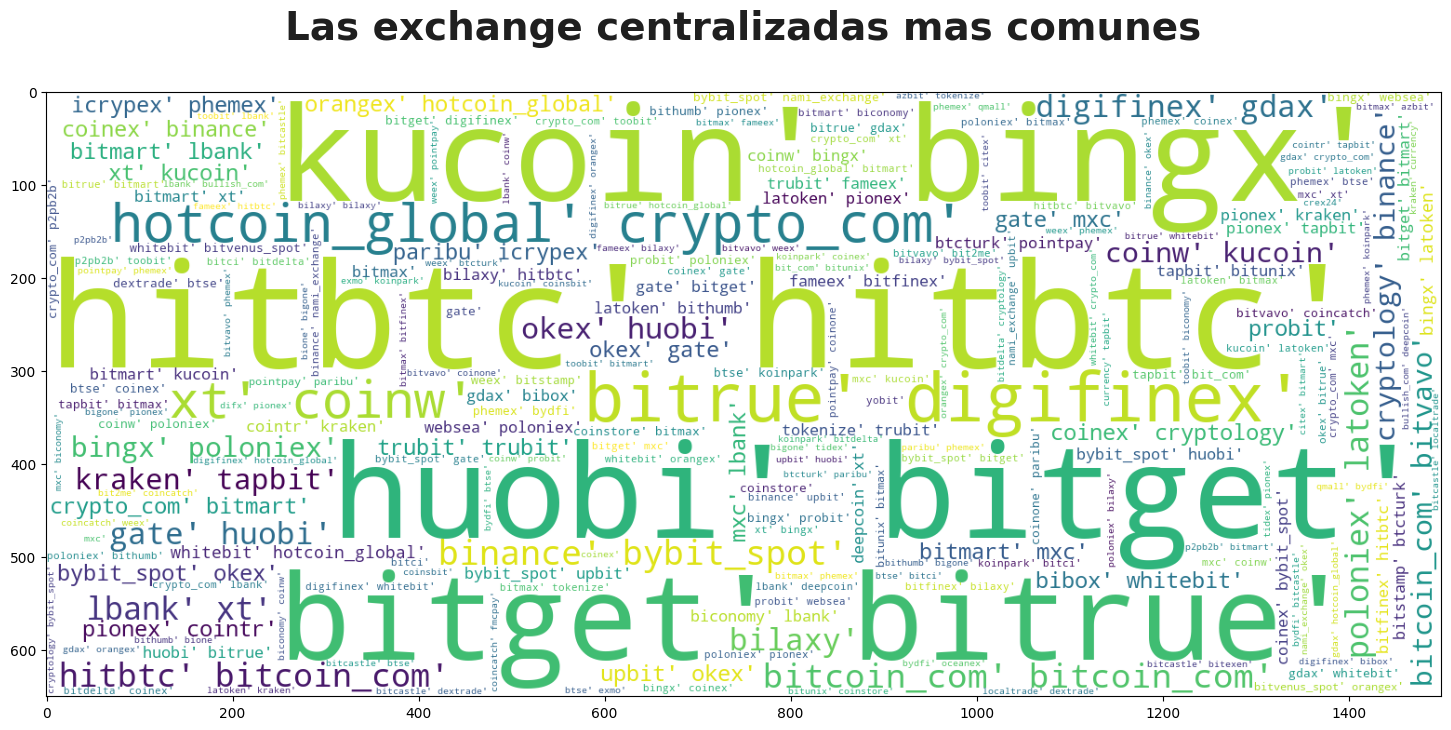

In [16]:
plt.figure(figsize=(18, 18))  # tamaño de la figura
plt.title(
    "Las exchange centralizadas mas comunes\n",
    fontsize=28,
    weight=600,
    color="#1f1f1f",
)
wordcloud = WordCloud(
    max_words=1000, min_font_size=10, height=650, width=1500, background_color="white"
).generate(" ".join(df["exchanges_centralized"]))

plt.imshow(X=wordcloud)

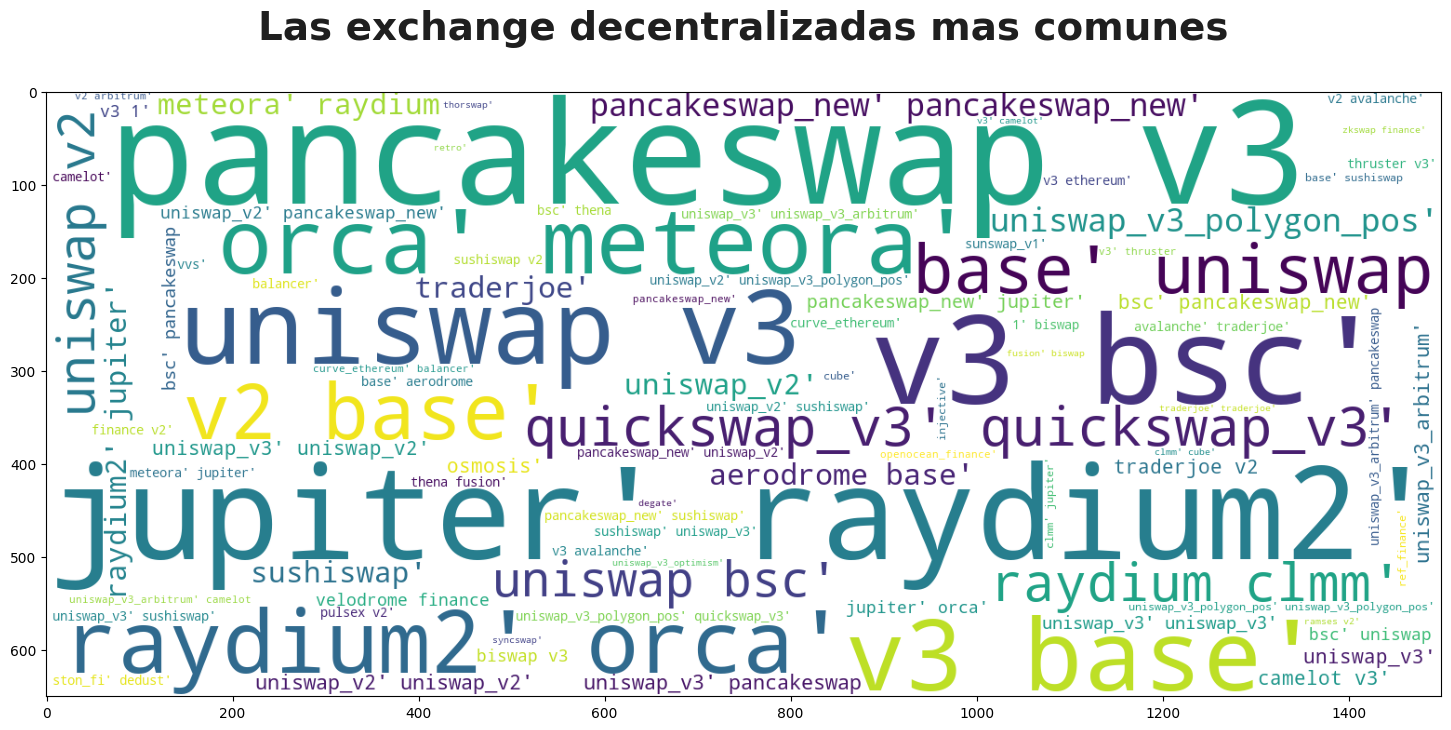

In [15]:
plt.figure(figsize=(18, 18))  # tamaño de la figura
plt.title(
    "Las exchange decentralizadas mas comunes\n",
    fontsize=28,
    weight=600,
    color="#1f1f1f",
)
wordcloud = WordCloud(
    max_words=1000, min_font_size=10, height=650, width=1500, background_color="white"
).generate(" ".join(df["exchanges_decentralized"]))

plt.imshow(X=wordcloud)